<a href="https://colab.research.google.com/github/chhendley/chhendley_python_projects/blob/main/customer_churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikeras
!pip install keras-tuner -q
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.3 MB/s eta 0:00:00


In [4]:
#machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

In [5]:

#neural network libraries
import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch
import keras
from keras.layers.core.dense import utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.saving.legacy.saving_utils import model_call_inputs
from keras.layers import BatchNormalization, LayerNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.layers import Input, Dense
from keras.layers import Dropout, Activation

In [ ]:
# load the dataset
url = 'https://github.com/chhendley/chhendley_python_projects/raw/main/WA_Fn-UseC_-Telco-Customer-Churn%20(1).csv'
#df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df=pd.read_csv(url)

In [ ]:
df = df.drop('customerID',axis=1)

In [ ]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [ ]:
# checking null value
df.isnull().sum()
#fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
#numerical variables
num = list(df.select_dtypes(include=['int64','float64']).keys())
#categorical variables
cat = list(df.select_dtypes(include='O').keys())

In [ ]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [ ]:
#convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)
#convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)
df.InternetService = df.InternetService.replace(0,'DSL')
label = LabelEncoder()
df['InternetService'] = label.fit_transform(df['InternetService'])


In [ ]:
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

In [ ]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [ ]:
#print correlation matrix to find which attributes are strongly correlated with output
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.011286,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.255338,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000304,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.165818,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.019720,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.289999,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.366083,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.468689,0.040102
InternetService,-0.011286,0.255338,0.000304,-0.165818,0.019720,0.289999,0.366083,1.000000,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,-0.254157,0.326853,-0.083868,0.787066,0.360547,0.308020
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.030696,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.165651,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.509692,-0.082255


In [ ]:
# independent and dependent variables
#x = df.drop('Churn',axis=1)
x = df.drop(['Churn', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies'], axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(5634, 13)
(1409, 13)


In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units = hp.Int('Dense1_neurons',min_value=3,max_value=5,step=2), input_shape=(13,), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D1_rate',min_value=.01,max_value=0.02,step=.01)))
  model.add(Dense(units = hp.Int('Dense2_neurons',min_value=3,max_value=5,step=2), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D2_rate',min_value=.01,max_value=0.02,step=.01)))
  model.add(Dense(units = hp.Int('Dense3_neurons',min_value=3,max_value=5,step=2), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D3_rate',min_value=.01,max_value=0.02,step=.01)))
  model.add(Dense(units = hp.Int('Dense4_neurons',min_value=18,max_value=20,step=2), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dense(1, activation='sigmoid'))
 # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_a = build_model

5, 0.01, 5, .01, 15, .01, 20

In [ ]:
import keras_tuner as kt

tuner = kt.GridSearch(model_a,
                     objective='val_accuracy',
                     max_trials=30,
                     directory='/content/drive/MyDrive/Colab Notebooks/model tuning',
                     project_name='RNN modele')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 01m 58s]
val_accuracy: 0.7728482484817505

Best val_accuracy So Far: 0.8047915101051331
Total elapsed time: 00h 31m 41s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print("Dense 1 nerons", best_hps.get('Dense1_neurons'))
print("Dense 2 nerons", best_hps.get('Dense2_neurons'))
print("Dense 2 nerons", best_hps.get('Dense3_neurons'))
print("Dense 2 nerons", best_hps.get('Dense4_neurons'))
print("D1 rate", best_hps.get('D1_rate'))
print("D1 rate", best_hps.get('D2_rate'))
print("D1 rate", best_hps.get('D3_rate'))

Dense 1 nerons 3
Dense 2 nerons 5
Dense 2 nerons 3
Dense 2 nerons 20
D1 rate 0.01
D1 rate 0.01
D1 rate 0.02


Dense 1 nerons 5
Dense 2 nerons 5
D1 rate 0.01

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
141/141 [==============================] - 5s 9ms/step - loss: 0.6073 - accuracy: 0.7167 - val_loss: 0.5999 - val_accuracy: 0.7196
Epoch 2/50
141/141 [==============================] - 1s 7ms/step - loss: 0.5845 - accuracy: 0.7286 - val_loss: 0.5948 - val_accuracy: 0.7196
Epoch 3/50
141/141 [==============================] - 1s 6ms/step - loss: 0.5845 - accuracy: 0.7313 - val_loss: 0.5932 - val_accuracy: 0.7196
Epoch 4/50
141/141 [==============================] - 1s 7ms/step - loss: 0.5841 - accuracy: 0.7313 - val_loss: 0.5962 - val_accuracy: 0.7196
Epoch 5/50
141/141 [==============================] - 1s 7ms/step - loss: 0.5834 - accuracy: 0.7313 - val_loss: 0.5935 - val_accuracy: 0.7196
Epoch 6/50
141/141 [==============================] - 1s 7ms/step - loss: 0.5833 - accuracy: 0.7313 - val_loss: 0.5988 - val_accuracy: 0.7196
Epoch 7/50
141/141 [==============================] - 1s 9ms/step - loss: 0.5840 - accuracy: 0.7315 - val_loss: 0.5934 - val_accuracy: 0.7196
Epoch 

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7721788502484032


In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7913413768630234


In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.801277501774308


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7984386089425124


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7317246273953159


In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8119233498935415

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8026969481902059


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8069552874378992


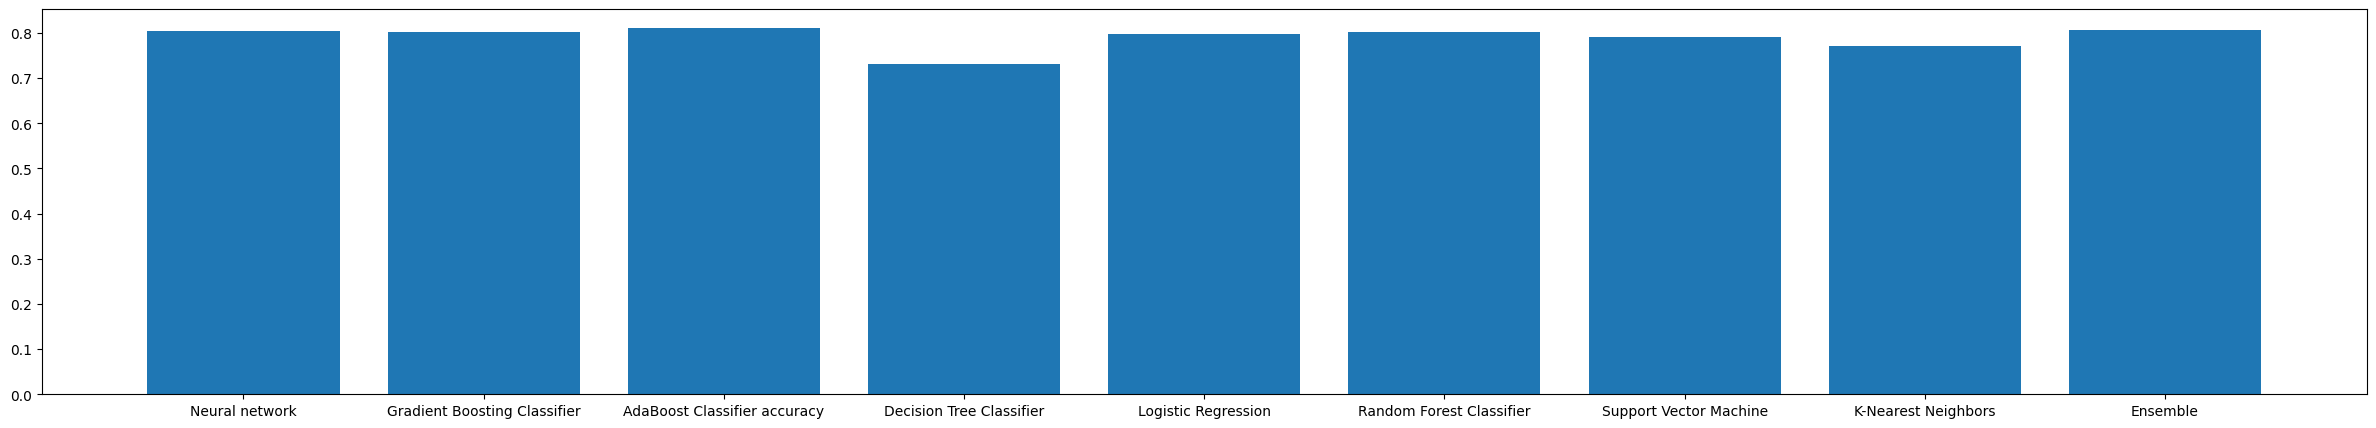

In [6]:
accuracy_dict = {'Neural network': 0.8047915101051331, 'Gradient Boosting Classifier': 0.8026969481902059,
                'AdaBoost Classifier accuracy': 0.8119233498935415, 'Decision Tree Classifier': 0.7317246273953159,
                 'Logistic Regression': 0.7984386089425124, 'Random Forest Classifier': 0.801277501774308,
                 'Support Vector Machine': 0.7913413768630234, 'K-Nearest Neighbors': 0.7721788502484032,
                 'Ensemble': 0.8069552874378992
                 }
names = list(accuracy_dict.keys())
values = list(accuracy_dict.values())
plt_1 = plt.figure(figsize=(30, 5))
plt.bar(range(len(accuracy_dict)), values, tick_label=names)

plt.show()